In [7]:
import pandas as pd
import lstm
import time

ModelInformation = pd.read_pickle("../model/ModelInformation.pickle")
global_start_time = time.time()
for i in range(len(ModelInformation)):
    forloop_start_time = time.time()
    #
    Filename = ModelInformation.loc[i,columns[0]]
    ColumnList = ModelInformation.loc[i,columns[1]]
    WindowSize = ModelInformation.loc[i,columns[2]]
    NumOfPredictDay = ModelInformation.loc[i,columns[3]]
    
    #載入資料
    DataSet = lstm.LoadData(Filename, ColumnList, WindowSize, NumOfPredictDay)
    #正規化資料
    NormalizeData = lstm.NormaliseWindows(DataSet)
    #切割資料
    #x_train, y_train, x_test, y_test = lstm.SplitData(NormalizeData, ColumnList, NumOfPredictDay)
    #sequence_length = WindowSize + NumOfPredictDay

    #切割訓練資料
    x_train, y_train = lstm.SplitDatatoTrain(NormalizeData, ColumnList, NumOfPredictDay)
    #切割預測資料
    x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
    x_predict = lstm.NormaliseWindows(x_predict)
    
    #
    Layer = ModelInformation.loc[i,columns[4]]
    Loss = ModelInformation.loc[i,columns[5]]
    Optimizer = ModelInformation.loc[i,columns[6]]
    
    #建立LSTM模型
    model = lstm.build_model(Layer,Loss,Optimizer)
    
    #
    BatchSize = ModelInformation.loc[i,columns[7]]
    Epoch = ModelInformation.loc[i,columns[8]]
    ValidationSplit = ModelInformation.loc[i,columns[9]]
    
    #訓練LSTM模型
    model.fit(  x_train,
                y_train,
                batch_size=BatchSize,
                nb_epoch=Epoch,
                validation_split=ValidationSplit)
    
    #
    ModelName = ModelInformation.loc[i,columns[10]]
    
    #HDF5, pip3
    model.save('../model/' + ModelName)
    print('Training duration (s) : ',time.time() - forloop_start_time)

print('Total training duration (s) : ',time.time() - global_start_time)

(3029, 50, 7)
(3029, 3)
(1, 50, 7)
> Compilation Time :  0.11205601692199707
Train on 2726 samples, validate on 303 samples
Epoch 1/10
2726/2726 [==============================] - 7s - loss: 0.0333 - val_loss: 0.0178
Epoch 2/10
2726/2726 [==============================] - 5s - loss: 0.0164 - val_loss: 0.0104
Epoch 3/10
2726/2726 [==============================] - 5s - loss: 0.0107 - val_loss: 0.0082
Epoch 4/10
2726/2726 [==============================] - 5s - loss: 0.0090 - val_loss: 0.0066
Epoch 5/10
2726/2726 [==============================] - 5s - loss: 0.0079 - val_loss: 0.0063
Epoch 6/10
2726/2726 [==============================] - 5s - loss: 0.0069 - val_loss: 0.0057
Epoch 7/10
2726/2726 [==============================] - 5s - loss: 0.0068 - val_loss: 0.0058
Epoch 8/10
2726/2726 [==============================] - 4s - loss: 0.0063 - val_loss: 0.0055
Epoch 9/10
2726/2726 [==============================] - 5s - loss: 0.0060 - val_loss: 0.0053
Epoch 10/10
2726/2726 [================

2656/2656 [==============================] - 10s - loss: 0.0417 - val_loss: 0.0317
Epoch 5/10
2656/2656 [==============================] - 10s - loss: 0.0344 - val_loss: 0.0256
Epoch 6/10
2656/2656 [==============================] - 10s - loss: 0.0305 - val_loss: 0.0228
Epoch 7/10
2656/2656 [==============================] - 12s - loss: 0.0288 - val_loss: 0.0213
Epoch 8/10
2656/2656 [==============================] - 11s - loss: 0.0269 - val_loss: 0.0200
Epoch 9/10
2656/2656 [==============================] - 10s - loss: 0.0255 - val_loss: 0.0187
Epoch 10/10
2656/2656 [==============================] - 10s - loss: 0.0247 - val_loss: 0.0185
Training duration (s) :  118.26662993431091
(2929, 150, 7)
(2929, 3)
(1, 150, 7)
> Compilation Time :  0.03215503692626953
Train on 2636 samples, validate on 293 samples
Epoch 1/10
2636/2636 [==============================] - 17s - loss: 0.1516 - val_loss: 0.0773
Epoch 2/10
2636/2636 [==============================] - 14s - loss: 0.0768 - val_loss: 0

2943/2943 [==============================] - 5s - loss: 0.0026 - val_loss: 0.0021
Epoch 9/10
2943/2943 [==============================] - 5s - loss: 0.0024 - val_loss: 0.0021
Epoch 10/10
2943/2943 [==============================] - 5s - loss: 0.0024 - val_loss: 0.0020
Training duration (s) :  64.62720513343811
(3251, 50, 7)
(3251, 30)
(1, 50, 7)
> Compilation Time :  0.03323507308959961
Train on 2925 samples, validate on 326 samples
Epoch 1/10
2925/2925 [==============================] - 9s - loss: 0.0172 - val_loss: 0.0131
Epoch 2/10
2925/2925 [==============================] - 5s - loss: 0.0131 - val_loss: 0.0096
Epoch 3/10
2925/2925 [==============================] - 5s - loss: 0.0092 - val_loss: 0.0055
Epoch 4/10
2925/2925 [==============================] - 5s - loss: 0.0068 - val_loss: 0.0042
Epoch 5/10
2925/2925 [==============================] - 5s - loss: 0.0056 - val_loss: 0.0041
Epoch 6/10
2925/2925 [==============================] - 5s - loss: 0.0052 - val_loss: 0.0039
Epoch

2853/2853 [==============================] - 21s - loss: 0.0309 - val_loss: 0.0158
Epoch 2/10
2853/2853 [==============================] - 16s - loss: 0.0111 - val_loss: 0.0065
Epoch 3/10
2853/2853 [==============================] - 16s - loss: 0.0060 - val_loss: 0.0042
Epoch 4/10
2853/2853 [==============================] - 15s - loss: 0.0049 - val_loss: 0.0031
Epoch 5/10
2853/2853 [==============================] - 15s - loss: 0.0040 - val_loss: 0.0029
Epoch 6/10
2853/2853 [==============================] - 16s - loss: 0.0034 - val_loss: 0.0028
Epoch 7/10
2853/2853 [==============================] - 15s - loss: 0.0033 - val_loss: 0.0027
Epoch 8/10
2853/2853 [==============================] - 15s - loss: 0.0032 - val_loss: 0.0025
Epoch 9/10
2853/2853 [==============================] - 15s - loss: 0.0030 - val_loss: 0.0025
Epoch 10/10
2853/2853 [==============================] - 16s - loss: 0.0029 - val_loss: 0.0025
Training duration (s) :  176.98804306983948
(3151, 150, 7)
(3151, 30)


2901/2901 [==============================] - 10s - loss: 2.6013 - val_loss: 0.0048
Epoch 6/10
2901/2901 [==============================] - 11s - loss: 2.5804 - val_loss: 0.0070
Epoch 7/10
2901/2901 [==============================] - 10s - loss: 2.5635 - val_loss: 0.0049
Epoch 8/10
2901/2901 [==============================] - 10s - loss: 2.5223 - val_loss: 0.0042
Epoch 9/10
2901/2901 [==============================] - 10s - loss: 2.4696 - val_loss: 0.0035
Epoch 10/10
2901/2901 [==============================] - 10s - loss: 2.4523 - val_loss: 0.0032
Training duration (s) :  123.41911101341248
(3221, 100, 7)
(3221, 10)
(1, 100, 7)
> Compilation Time :  0.03152585029602051
Train on 2898 samples, validate on 323 samples
Epoch 1/10
2898/2898 [==============================] - 16s - loss: 2.5706 - val_loss: 0.0314
Epoch 2/10
2898/2898 [==============================] - 10s - loss: 2.5485 - val_loss: 0.0163
Epoch 3/10
2898/2898 [==============================] - 11s - loss: 2.5139 - val_loss: 

2950/2950 [==============================] - 5s - loss: 0.0017 - val_loss: 0.0013
Epoch 10/10
2950/2950 [==============================] - 5s - loss: 0.0016 - val_loss: 0.0012
Training duration (s) :  71.55992293357849
(3274, 50, 7)
(3274, 7)
(1, 50, 7)
> Compilation Time :  0.03536057472229004
Train on 2946 samples, validate on 328 samples
Epoch 1/10
2946/2946 [==============================] - 12s - loss: 0.0099 - val_loss: 0.0068
Epoch 2/10
2946/2946 [==============================] - 5s - loss: 0.0054 - val_loss: 0.0037
Epoch 3/10
2946/2946 [==============================] - 5s - loss: 0.0032 - val_loss: 0.0027
Epoch 4/10
2946/2946 [==============================] - 5s - loss: 0.0027 - val_loss: 0.0024
Epoch 5/10
2946/2946 [==============================] - 5s - loss: 0.0025 - val_loss: 0.0021
Epoch 6/10
2946/2946 [==============================] - 5s - loss: 0.0023 - val_loss: 0.0020
Epoch 7/10
2946/2946 [==============================] - 5s - loss: 0.0021 - val_loss: 0.0020
Epoch

2860/2860 [==============================] - 18s - loss: 0.0081 - val_loss: 0.0044
Epoch 3/10
2860/2860 [==============================] - 15s - loss: 0.0042 - val_loss: 0.0027
Epoch 4/10
2860/2860 [==============================] - 16s - loss: 0.0034 - val_loss: 0.0023
Epoch 5/10
2860/2860 [==============================] - 15s - loss: 0.0030 - val_loss: 0.0017
Epoch 6/10
2860/2860 [==============================] - 15s - loss: 0.0026 - val_loss: 0.0018
Epoch 7/10
2860/2860 [==============================] - 15s - loss: 0.0024 - val_loss: 0.0016
Epoch 8/10
2860/2860 [==============================] - 16s - loss: 0.0022 - val_loss: 0.0015
Epoch 9/10
2860/2860 [==============================] - 16s - loss: 0.0022 - val_loss: 0.0015
Epoch 10/10
2860/2860 [==============================] - 15s - loss: 0.0021 - val_loss: 0.0015
Training duration (s) :  183.5378429889679
(3174, 150, 7)
(3174, 7)
(1, 150, 7)
> Compilation Time :  0.042649030685424805
Train on 2856 samples, validate on 318 sa

2920/2920 [==============================] - 5s - loss: 0.8182 - val_loss: 0.0115
Epoch 7/10
2920/2920 [==============================] - 5s - loss: 0.8037 - val_loss: 0.0115
Epoch 8/10
2920/2920 [==============================] - 5s - loss: 0.7943 - val_loss: 0.0110
Epoch 9/10
2920/2920 [==============================] - 5s - loss: 0.7813 - val_loss: 0.0099
Epoch 10/10
2920/2920 [==============================] - 5s - loss: 0.7616 - val_loss: 0.0097
Training duration (s) :  72.65646624565125
(3222, 100, 7)
(3222, 3)
(1, 100, 7)
> Compilation Time :  0.03731989860534668
Train on 2899 samples, validate on 323 samples
Epoch 1/10
2899/2899 [==============================] - 21s - loss: 0.5565 - val_loss: 0.0214
Epoch 2/10
2899/2899 [==============================] - 11s - loss: 0.5247 - val_loss: 0.0115
Epoch 3/10
2899/2899 [==============================] - 10s - loss: 0.5166 - val_loss: 0.0073
Epoch 4/10
2899/2899 [==============================] - 11s - loss: 0.5057 - val_loss: 0.0081


2848/2848 [==============================] - 17s - loss: 0.0086 - val_loss: 2.2505
Training duration (s) :  199.0804159641266
(3145, 150, 7)
(3145, 30)
(1, 150, 7)
> Compilation Time :  0.03621983528137207
Train on 2830 samples, validate on 315 samples
Epoch 1/10
2830/2830 [==============================] - 28s - loss: 0.3210 - val_loss: 0.0830
Epoch 2/10
2830/2830 [==============================] - 17s - loss: 0.2883 - val_loss: 0.0478
Epoch 3/10
2830/2830 [==============================] - 16s - loss: 0.2550 - val_loss: 0.0279
Epoch 4/10
2830/2830 [==============================] - 17s - loss: 0.2366 - val_loss: 0.0160
Epoch 5/10
2830/2830 [==============================] - 16s - loss: 0.2256 - val_loss: 0.0124
Epoch 6/10
2830/2830 [==============================] - 16s - loss: 0.2194 - val_loss: 0.0138
Epoch 7/10
2830/2830 [==============================] - 16s - loss: 0.2171 - val_loss: 0.0124
Epoch 8/10
2830/2830 [==============================] - 16s - loss: 0.2063 - val_loss: 0.

2898/2898 [==============================] - 11s - loss: 0.0127 - val_loss: 0.0128
Epoch 4/10
2898/2898 [==============================] - 10s - loss: 0.0106 - val_loss: 0.0111
Epoch 5/10
2898/2898 [==============================] - 10s - loss: 0.0090 - val_loss: 0.0108
Epoch 6/10
2898/2898 [==============================] - 10s - loss: 0.0086 - val_loss: 0.0100
Epoch 7/10
2898/2898 [==============================] - 10s - loss: 0.0079 - val_loss: 0.0095
Epoch 8/10
2898/2898 [==============================] - 10s - loss: 0.0076 - val_loss: 0.0093
Epoch 9/10
2898/2898 [==============================] - 10s - loss: 0.0072 - val_loss: 0.0092
Epoch 10/10
2898/2898 [==============================] - 11s - loss: 0.0071 - val_loss: 0.0089
Training duration (s) :  136.4001669883728
(3201, 100, 7)
(3201, 30)
(1, 100, 7)
> Compilation Time :  0.03569984436035156
Train on 2880 samples, validate on 321 samples
Epoch 1/10
2880/2880 [==============================] - 23s - loss: 0.0606 - val_loss: 0

2946/2946 [==============================] - 5s - loss: 0.0102 - val_loss: 0.0067
Epoch 8/10
2946/2946 [==============================] - 5s - loss: 0.0097 - val_loss: 0.0065
Epoch 9/10
2946/2946 [==============================] - 5s - loss: 0.0091 - val_loss: 0.0062
Epoch 10/10
2946/2946 [==============================] - 5s - loss: 0.0088 - val_loss: 0.0063
Training duration (s) :  77.9945330619812
(3271, 50, 7)
(3271, 10)
(1, 50, 7)
> Compilation Time :  0.03331422805786133
Train on 2943 samples, validate on 328 samples
Epoch 1/10
2943/2943 [==============================] - 18s - loss: 0.0506 - val_loss: 0.0350
Epoch 2/10
2943/2943 [==============================] - 5s - loss: 0.0260 - val_loss: 0.0196
Epoch 3/10
2943/2943 [==============================] - 5s - loss: 0.0175 - val_loss: 0.0156
Epoch 4/10
2943/2943 [==============================] - 5s - loss: 0.0154 - val_loss: 0.0142
Epoch 5/10
2943/2943 [==============================] - 5s - loss: 0.0134 - val_loss: 0.0124
Epoch

> Compilation Time :  0.03214001655578613
Train on 2856 samples, validate on 318 samples
Epoch 1/10
2856/2856 [==============================] - 32s - loss: 0.2639 - val_loss: 0.1367
Epoch 2/10
2856/2856 [==============================] - 16s - loss: 0.1133 - val_loss: 0.0676
Epoch 3/10
2856/2856 [==============================] - 18s - loss: 0.0578 - val_loss: 0.0449
Epoch 4/10
2856/2856 [==============================] - 17s - loss: 0.0453 - val_loss: 0.0316
Epoch 5/10
2856/2856 [==============================] - 18s - loss: 0.0370 - val_loss: 0.0269
Epoch 6/10
2856/2856 [==============================] - 17s - loss: 0.0326 - val_loss: 0.0254
Epoch 7/10
2856/2856 [==============================] - 16s - loss: 0.0300 - val_loss: 0.0238
Epoch 8/10
2856/2856 [==============================] - 16s - loss: 0.0277 - val_loss: 0.0226
Epoch 9/10
2856/2856 [==============================] - 16s - loss: 0.0273 - val_loss: 0.0215
Epoch 10/10
2856/2856 [==============================] - 17s - lo

2298/2298 [==============================] - 8s - loss: 0.0165 - val_loss: 0.0092
Epoch 6/10
2298/2298 [==============================] - 8s - loss: 0.0135 - val_loss: 0.0095
Epoch 7/10
2298/2298 [==============================] - 8s - loss: 0.0124 - val_loss: 0.0089
Epoch 8/10
2298/2298 [==============================] - 8s - loss: 0.0114 - val_loss: 0.0084
Epoch 9/10
2298/2298 [==============================] - 8s - loss: 0.0111 - val_loss: 0.0077
Epoch 10/10
2298/2298 [==============================] - 8s - loss: 0.0100 - val_loss: 0.0076
Training duration (s) :  114.58035612106323
(2550, 100, 7)
(2550, 7)
(1, 100, 7)
> Compilation Time :  0.028998851776123047
Train on 2295 samples, validate on 255 samples
Epoch 1/10
2295/2295 [==============================] - 22s - loss: 0.1297 - val_loss: 0.0865
Epoch 2/10
2295/2295 [==============================] - 8s - loss: 0.0627 - val_loss: 0.0338
Epoch 3/10
2295/2295 [==============================] - 8s - loss: 0.0358 - val_loss: 0.0257
E

2229/2229 [==============================] - 12s - loss: 0.0335 - val_loss: 0.0291
Epoch 10/10
2229/2229 [==============================] - 12s - loss: 0.0307 - val_loss: 0.0262
Training duration (s) :  156.69274306297302
Training duration (s) :  12102.321468114853


(3024, 50, 7)
(3024, 3)
(1, 50, 7)
(3, 1)


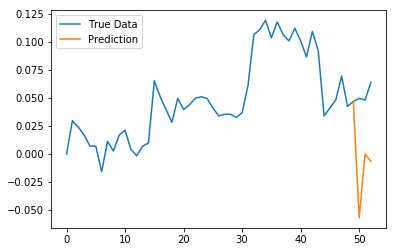

In [52]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)